# Use 3 standard deviation to remove outlier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [56]:
df=pd.read_csv('D:/Data/height.csv')
df.head(10)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,68.348516
8,Male,67.018950
9,Male,63.456494


In [32]:
df.shape

(10000, 2)

Text(0, 0.5, 'Count')

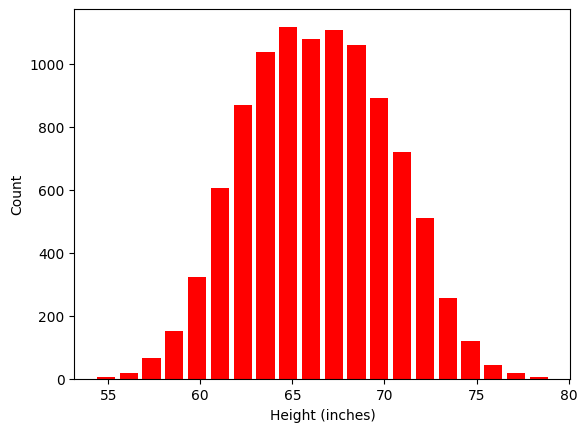

In [33]:
plt.hist(df.Height,bins=20,rwidth=0.8,color='red')
plt.xlabel('Height (inches)')
plt.ylabel('Count')

# Graph is not accurate or not good

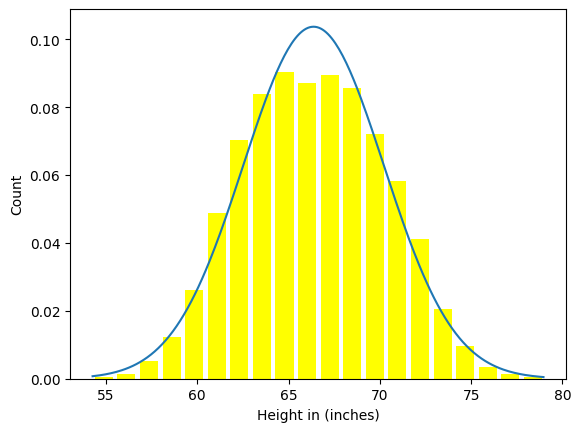

In [35]:
plt.hist(df.Height,bins=20,rwidth=0.8,density=True,color='yellow')
plt.xlabel('Height in (inches)')
plt.ylabel('Count')
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [36]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [37]:
upper_limit=df.Height.mean()+3*df.Height.std()
lower_limit=df.Height.mean() -3*df.Height.std()


In [38]:
upper_limit,lower_limit

(77.91014411725271, 54.824975392479274)

In [39]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [50]:
df1=df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df1

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [41]:
df1.shape

(9993, 2)

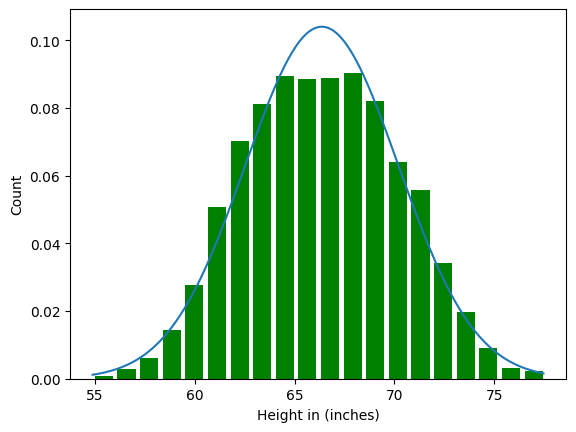

In [51]:
plt.hist(df1.Height,bins=20,rwidth=0.8,color='green',density=True)
plt.xlabel('Height in (inches)')
plt.ylabel("Count")

rn=np.arange(df1.Height.min(),df1.Height.max(),0.1)
plt.plot(rn,norm.pdf(rn,df1.Height.mean(),df1.Height.std()))

In [43]:
# now use Z score to remove outlier
#formula for calculate Z score
#Z=x-mean/std

In [55]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [60]:
df['zscore']=(df.Height - df.Height.mean())/ df.Height.std()
df.zscore.describe()

count    1.000000e+04
mean     1.659828e-15
std      1.000000e+00
min     -3.146027e+00
25%     -7.438384e-01
50%     -1.286272e-02
75%      7.294819e-01
max      3.282934e+00
Name: zscore, dtype: float64

In [61]:
df[df.zscore>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [62]:
df[df.zscore<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [69]:
df2=df[(df.zscore<3) & (df.zscore>-3)]


In [70]:
df2.shape

(9993, 3)